<a href="https://colab.research.google.com/github/dave-heslop74/APA/blob/main/Plotting_test_Phyphox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Template to import data from a Google sheet that I've pasted data into. Via shared link. This is my test.

In [ ]:
!pip install gspread google-auth

In [2]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [4]:
# Replace with your actual shared Google Sheet URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1no7Qnab_NX5CwK-o8eaviQy3VjflDiWOnjMAaitk514/edit?usp=sharing'
worksheet = gc.open_by_url(spreadsheet_url).worksheet('Sheet1') # Replace 'Sheet1' with your sheet name

In [5]:
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0]) # Assuming the first row is the header
df = df.apply(pd.to_numeric, errors="coerce")

In [6]:
df.head()

,Time (s),X (µT),Y (µT),Z (µT)
0,0.006458,12.562195,41.111656,42.492218
1,0.016438,12.318146,40.978592,42.471069
2,0.026418,12.175110,40.917709,42.410644
3,0.036397,11.584442,40.132168,43.118301
4,0.046377,11.538116,39.742455,43.753098


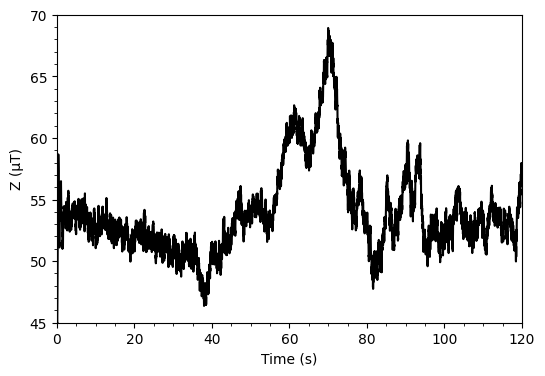

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df['Time (s)'],df['Z (µT)'],'k')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Z (µT)')

ax.set_xlim([0,120])
ax.set_ylim([45,70])

ax.minorticks_on()

(0.0, 120.0)

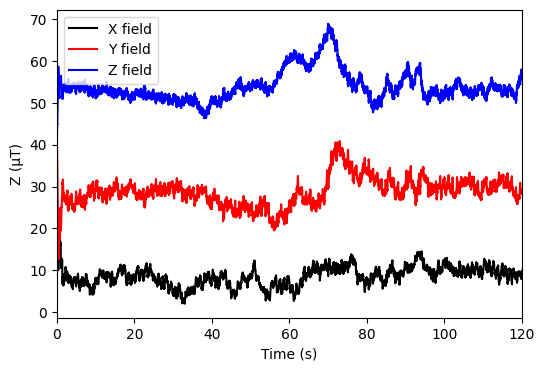

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df['Time (s)'],df['X (µT)'],'k',label='X field')
ax.plot(df['Time (s)'],df['Y (µT)'],'r',label='Y field')
ax.plot(df['Time (s)'],df['Z (µT)'],'b',label='Z field')
ax.legend()

ax.set_xlabel('Time (s)')
ax.set_ylabel('Z (µT)')

ax.set_xlim([0,120])

Text(0.5, 0, 'Time (s)')

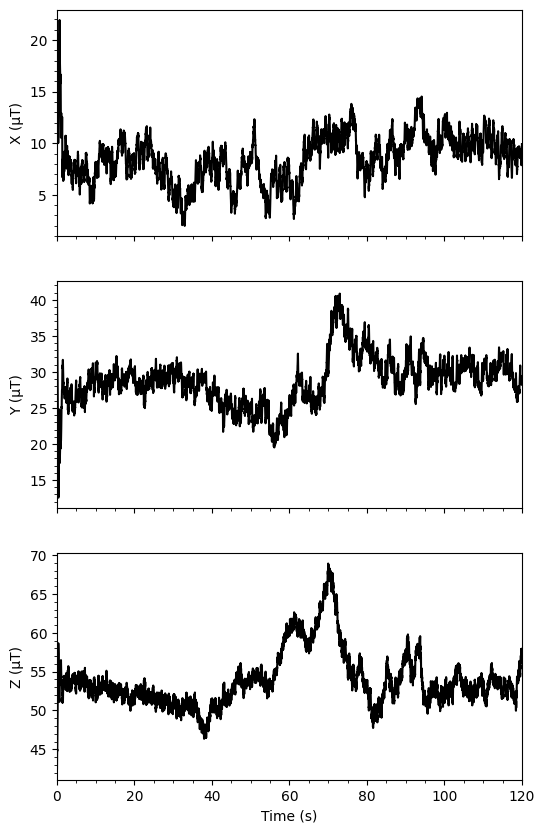

In [11]:
fig, ax = plt.subplots(3,1,figsize=(6, 10),sharex=True)

ax[0].plot(df['Time (s)'],df['X (µT)'],'k')
ax[0].set_ylabel('X (µT)')
#ax[0].set_ylim([45,70])
ax[0].minorticks_on()

ax[1].plot(df['Time (s)'],df['Y (µT)'],'k')
ax[1].set_ylabel('Y (µT)')
#ax[1].set_ylim([45,70])
ax[1].minorticks_on()

ax[2].plot(df['Time (s)'],df['Z (µT)'],'k')
ax[2].set_ylabel('Z (µT)')
#ax[2].set_ylim([45,70])
ax[2].minorticks_on()

ax[2].set_xlim([0,120])
ax[2].set_xlabel('Time (s)')